# Intrusion Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Import data

Data from https://mega.nz/folder/z0pnGA4a#WFEUISyS5_maabhcEI7HQA

The dataset consists of 5 JSON files from 5 receiver vehicles and 1 CSV file containing attacker labels, primarily focusing on testing V2X security through a simulated environment generated using LuST and VEINS based on OMNET++ and SUMO. The data, collected during specific time intervals between 07:00-09:00 and 14:00-16:00, encompasses various attack types including position and speed malfunctions, delayed messages, and DoS attacks, with a particular focus on DoS attacks for analysis.

In [2]:
df_labels = pd.read_csv('dos_dataset/sender_labels.csv', sep=';')

In [3]:
df_labels.head()

,sender,label
0,9,0
1,15,1
2,21,0
3,27,0
4,33,1


In [4]:
df_receiver_9 = pd.read_json('dos_dataset/dos_dataset/traceJSON-9-7-A0-50404-14.json', lines=True)
df_receiver_15 = pd.read_json('dos_dataset/dos_dataset/traceJSON-15-13-A13-50404-14.json', lines=True)
df_receiver_21 = pd.read_json('dos_dataset/dos_dataset/traceJSON-21-19-A0-50408-14.json', lines=True)
df_receiver_27 = pd.read_json('dos_dataset/dos_dataset/traceJSON-27-25-A0-50408-14.json', lines=True)
df_receiver_33 = pd.read_json('dos_dataset/dos_dataset/traceJSON-33-31-A13-50413-14.json', lines=True)

## Process data

The code initially filters each dataframe of each receiver to retain only rows where the value in the 'type' column equals 3, thus selecting a subset of the data. It then appends a new column called 'receiver' to each dataframe, assigning receiver IDs (9, 15, 21, 27, and 33) respectively. Subsequently, the code merges each filtered dataframe with another dataframe based on a sender column , adding labels to the data. Lastly, the process_columns function is defined to handle further data processing. It applies the function to each column specified ('pos', 'pos_noise', 'spd', 'spd_noise', 'acl', 'acl_noise', 'hed', 'hed_noise') within each dataframe. The function splits each value in the specified column into two parts and creates two new columns with '_0' and '_1' suffixes, representing each part. Afterward, it drops the original column from the dataframe. This function is iterated over each dataframe.

In [5]:
# only keep type 3 
df_receiver_9 = df_receiver_9[df_receiver_9['type'] == 3]
df_receiver_15 = df_receiver_15[df_receiver_15['type'] == 3]
df_receiver_21 = df_receiver_21[df_receiver_21['type'] == 3]
df_receiver_27 = df_receiver_27[df_receiver_27['type'] == 3]
df_receiver_33 = df_receiver_33[df_receiver_33['type'] == 3]

In [6]:
# add column for receiver id
df_receiver_9['receiver'] = 9
df_receiver_15['receiver'] = 15
df_receiver_21['receiver'] = 21
df_receiver_27['receiver'] = 27
df_receiver_33['receiver'] = 33

In [7]:
# merge with sender labels
df_receiver_9 = df_receiver_9.merge(df_labels, on='sender')
df_receiver_15 = df_receiver_15.merge(df_labels, on='sender')
df_receiver_21 = df_receiver_21.merge(df_labels, on='sender')
df_receiver_27 = df_receiver_27.merge(df_labels, on='sender')
df_receiver_33 = df_receiver_33.merge(df_labels, on='sender')

In [8]:
def process_columns(col_name, df):
    df[f'{col_name}_0'] = df[col_name].apply(lambda x: x[0])
    df[f'{col_name}_1'] = df[col_name].apply(lambda x: x[1])
    df.drop(col_name, axis=1, inplace=True)
    return df

In [9]:
for df in [df_receiver_9, df_receiver_15, df_receiver_21, df_receiver_27, df_receiver_33]:
    for col in ['pos', 'pos_noise', 'spd', 'spd_noise', 'acl', 'acl_noise', 'hed', 'hed_noise']:
        df = process_columns(col, df)

## Discover dataset

In [10]:
df_receivers = pd.concat([df_receiver_9, df_receiver_15, df_receiver_21, df_receiver_27, df_receiver_33])

In [11]:
df_receivers.columns

Index(['type', 'rcvTime', 'sendTime', 'sender', 'senderPseudo', 'messageID',
       'receiver', 'label', 'pos_0', 'pos_1', 'pos_noise_0', 'pos_noise_1',
       'spd_0', 'spd_1', 'spd_noise_0', 'spd_noise_1', 'acl_0', 'acl_1',
       'acl_noise_0', 'acl_noise_1', 'hed_0', 'hed_1', 'hed_noise_0',
       'hed_noise_1'],
      dtype='object')

<AxesSubplot:xlabel='label'>

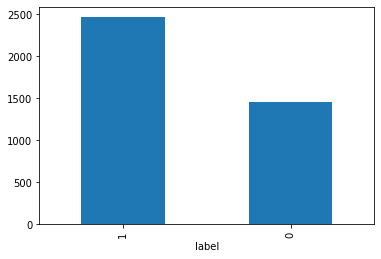

In [12]:
df_receivers['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Receiver vs Label')

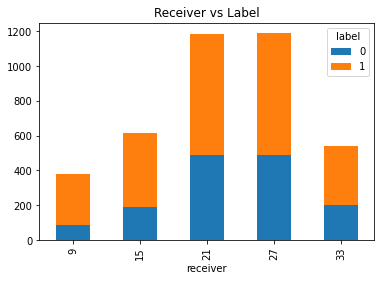

In [36]:
df_receivers.groupby(['receiver', 'label']).size().unstack().plot(kind='bar', stacked=True).set_title('Receiver vs Label')

Text(0.5, 1.0, 'Sender IDs with different labels')

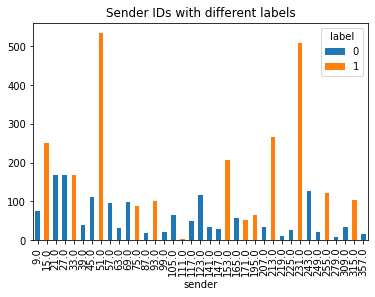

In [13]:
df_receivers.groupby(['sender', 'label']).size().unstack().plot(kind='bar', stacked=True).set_title('Sender IDs with different labels')

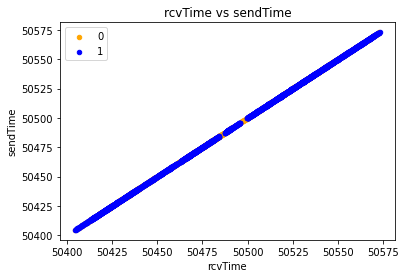

In [37]:
fig, ax = plt.subplots()
colors = {0: 'orange', 1: 'blue'}
grouped = df_receivers.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='rcvTime', y='sendTime', label=key, color=colors[key])
ax.set_title('rcvTime vs sendTime')
plt.show()

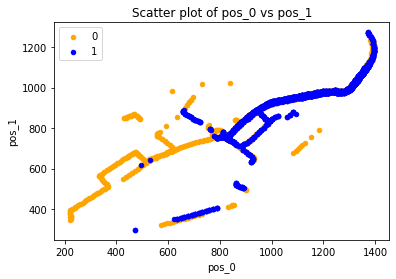

In [38]:
fig, ax = plt.subplots()
colors = {0: 'orange', 1: 'blue'}
grouped = df_receivers.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='pos_0', y='pos_1', label=key, color=colors[key])
plt.title('Scatter plot of pos_0 vs pos_1')
plt.show()

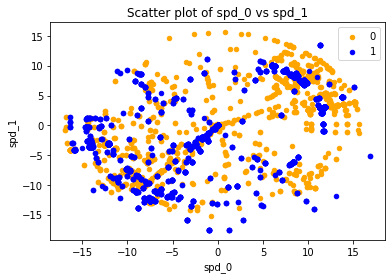

In [39]:
fig, ax = plt.subplots()
colors = {0: 'orange', 1: 'blue'}
grouped = df_receivers.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='spd_0', y='spd_1', label=key, color=colors[key])
plt.title('Scatter plot of spd_0 vs spd_1')
plt.show()

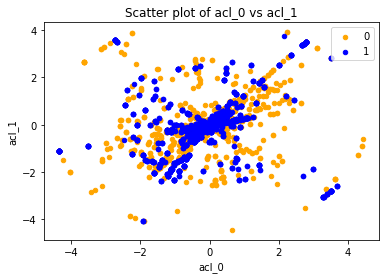

In [40]:
fig, ax = plt.subplots()
colors = {0: 'orange', 1: 'blue'}
grouped = df_receivers.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='acl_0', y='acl_1', label=key, color=colors[key])
plt.title('Scatter plot of acl_0 vs acl_1')
plt.show()

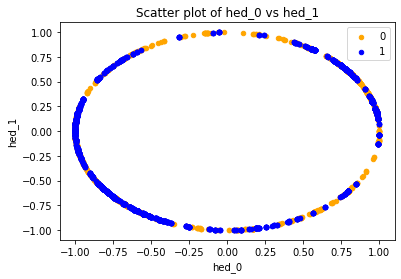

In [41]:
fig, ax = plt.subplots()
colors = {0: 'orange', 1: 'blue'}
grouped = df_receivers.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='hed_0', y='hed_1', label=key, color=colors[key])
plt.title('Scatter plot of hed_0 vs hed_1')
plt.show()

## Implement the Federated Learning (FL) based on any suitable ML method

The chosen approach was to employ Logistic Regression models within a federated learning method. This involved training individual models for each receiver (referred to as clients in the federated learning paradigm). Specifically, a Logistic Regression model was trained independently for each receiver using its respective data.

After training these individual models, the weights of each model were aggregated to create a unified, or aggregated, model. This aggregation process typically involves averaging or combining the weights of the individual models to generate a single model that encompasses the collective knowledge learned from all clients.

In [19]:
class LogisticRegressionModel:
    def __init__(self):
        self.model = LogisticRegression()

    def train(self, X, y):
        self.model.fit(X, y)

    def get_weights(self):
        return self.model.coef_[0]

In [20]:
class AggregatedModel:
    def __init__(self, aggregated_weights):
        self.weights = aggregated_weights

    def predict(self, X):
        logits = np.dot(X, self.weights)
        probabilities = 1 / (1 + np.exp(-logits))  # Sigmoid function for binary classification
        return (probabilities >= 0.5).astype(int)  # Thresholding probabilities for binary classification

In [21]:
def simulate_training(model, X_train, y_train):
    model.train(X_train, y_train)

In [22]:
def aggregate(models):
    avg_weights = np.mean([model.get_weights() for model in models], axis=0)
    return avg_weights

In [23]:
X_receiver_9 = df_receiver_9.drop(columns=['label']).values
y_receiver_9 = df_receiver_9['label'].values

X_receiver_15 = df_receiver_15.drop(columns=['label']).values
y_receiver_15 = df_receiver_15['label'].values

X_receiver_21 = df_receiver_21.drop(columns=['label']).values
y_receiver_21 = df_receiver_21['label'].values

X_receiver_27 = df_receiver_27.drop(columns=['label']).values
y_receiver_27 = df_receiver_27['label'].values

X_receiver_33 = df_receiver_33.drop(columns=['label']).values
y_receiver_33 = df_receiver_33['label'].values

In [24]:
# Splitting data into train and test sets for each receiver

X_receiver_9_train, X_receiver_9_test, y_receiver_9_train, y_receiver_9_test = train_test_split(
    X_receiver_9, y_receiver_9, test_size=0.2, random_state=42)

X_receiver_15_train, X_receiver_15_test, y_receiver_15_train, y_receiver_15_test = train_test_split(
    X_receiver_15, y_receiver_15, test_size=0.2, random_state=42)

X_receiver_21_train, X_receiver_21_test, y_receiver_21_train, y_receiver_21_test = train_test_split(
    X_receiver_21, y_receiver_21, test_size=0.2, random_state=42)

X_receiver_27_train, X_receiver_27_test, y_receiver_27_train, y_receiver_27_test = train_test_split(
    X_receiver_27, y_receiver_27, test_size=0.2, random_state=42)

X_receiver_33_train, X_receiver_33_test, y_receiver_33_train, y_receiver_33_test = train_test_split(
    X_receiver_33, y_receiver_33, test_size=0.2, random_state=42)

In [25]:
# Initialize models for each receiver
model_receiver_9 = LogisticRegressionModel()
model_receiver_15 = LogisticRegressionModel()
model_receiver_21 = LogisticRegressionModel()
model_receiver_27 = LogisticRegressionModel()
model_receiver_33 = LogisticRegressionModel()

In [26]:
simulate_training(model_receiver_9, X_receiver_9_train, y_receiver_9_train)

/home/cytech/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
simulate_training(model_receiver_15, X_receiver_15_train, y_receiver_15_train)

/home/cytech/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
simulate_training(model_receiver_21, X_receiver_21_train, y_receiver_21_train)

In [29]:
simulate_training(model_receiver_27, X_receiver_27_train, y_receiver_27_train)

In [30]:
simulate_training(model_receiver_33, X_receiver_33_train, y_receiver_33_train)

In [31]:
# Aggregate models
aggregated_weights = aggregate([model_receiver_9, model_receiver_15, model_receiver_21, model_receiver_27, model_receiver_33])

# Create the aggregated model
aggregated_model = AggregatedModel(aggregated_weights)

## Evaluate performance of this method

In [32]:
def evaluate_model(model, X_eval, y_eval):
    y_pred = model.model.predict(X_eval)
    accuracy = accuracy_score(y_eval, y_pred)
    return accuracy

In [33]:
accuracy_receiver_9 = evaluate_model(model_receiver_9, X_receiver_9_test, y_receiver_9_test)
print("Accuracy for Receiver 9:", accuracy_receiver_9)

accuracy_receiver_15 = evaluate_model(model_receiver_15, X_receiver_15_test, y_receiver_15_test)
print("Accuracy for Receiver 15:", accuracy_receiver_15)

accuracy_receiver_21 = evaluate_model(model_receiver_21, X_receiver_21_test, y_receiver_21_test)
print("Accuracy for Receiver 21:", accuracy_receiver_21)

accuracy_receiver_27 = evaluate_model(model_receiver_27, X_receiver_27_test, y_receiver_27_test)
print("Accuracy for Receiver 27:", accuracy_receiver_27)

accuracy_receiver_33 = evaluate_model(model_receiver_33, X_receiver_33_test, y_receiver_33_test)
print("Accuracy for Receiver 33:", accuracy_receiver_33)

Accuracy for Receiver 9: 0.948051948051948
Accuracy for Receiver 15: 0.7804878048780488
Accuracy for Receiver 21: 0.7689075630252101
Accuracy for Receiver 27: 0.8025210084033614
Accuracy for Receiver 33: 0.8990825688073395


In [34]:
X_test_aggregated = np.concatenate((X_receiver_9_test, X_receiver_15_test, X_receiver_21_test, X_receiver_27_test, X_receiver_33_test))
y_test_aggregated = np.concatenate((y_receiver_9_test, y_receiver_15_test, y_receiver_21_test, y_receiver_27_test, y_receiver_33_test))

accuracy_aggregated = accuracy_score(y_test_aggregated, aggregated_model.predict(X_test_aggregated))
print("Accuracy for Aggregated Model:", accuracy_aggregated)

Accuracy for Aggregated Model: 0.7388535031847133


In conclusion, the evaluation metrics, particularly accuracy, have yielded satisfactory results. However, further improvements could potentially be achieved through adjustments to feature selection and logistic regression hyperparameters.

Federated Learning (FL) stands out as an effective method for addressing the challenges posed by this dataset and problem domain. It allows for collaborative model training across distributed datasets while preserving data privacy and security. Given the diverse nature of vehicular environments and behaviors, FL's collaborative learning approach is well-suited for capturing the intricacies of the data across different receivers. Additionally, FL facilitates scalability by distributing the computational load among multiple devices or servers, making it feasible for large-scale deployments in real-world settings. Overall, FL proves to be a suitable method for addressing the challenges of this dataset, offering both performance improvements and data privacy assurances.